In [1]:
#TODO: Time series analysis: https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 

# -die pokemon-hausaufgabe machen -> und in der nächsten woche zeigen wie ich das fixe

# example für nen pandas-contextmanager:
#                 # old = pd.get_option('display.max_columns')
#                 # pd.set_option("display.max_columns", 101)
#                 with pd.option_context('display.max_rows', 101, 'display.max_columns', 20, 'display.expand_frame_repr', False, 'display.max_colwidth', 120): #max_colwidth -1
#                     print(old_df.loc[unallowed_indices])
#                 # pd.set_option("display.max_columns", old) 

# -> Bring pandas up to date - Include named aggregation (https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html#named-aggregation), query, assign and the fluent style in general.

In [1]:
import sys; sys.path.append("..")
from utils import count_down

.
# Cleaning Data with Pandas
Cleaning data is a huge topic. Some people claim that data scientists spend 80% of their time just cleaning their data. The topics that we will cover here are 

* handling missing values
* removing duplicates
* structuring data
* removing outliers
* finding the right data types

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.append("..")
from utils import count_down

# Missing values

A sentinel value is used to represent missing values for numbers. A special combinations of bits represents "Not a number" (NaN). This can be thought of as the numeric equivalent of `None`. In Python `NaN` is available through the `NumPy` package. To represent missing values in non-numeric data, Pandas just uses `None`.

`NaN` has very peculiar semantics when it comes to equality testing. In fact, `NaN` does not equal anything, not even itself.

In [2]:
np.nan == np.nan

False

This might seems strange at first, but starts to make sense when we think about the semantics of `NaN` or more generally `NA` as a placeholder for a value that is __N__ot **A**vailable. As `NA` just represents any value that we do not know, it would be wrong to say that a value that we do not know equals another value that we do not know. Therefore `NA` can not really equal anything.

To explicitly test for `NA` we need a separate function, that is provided by `pandas`.

In [3]:
pd.isna(np.nan)

True

In [4]:
pd.isna(42)

False

## Handling missing values

In [5]:
ebola = pd.read_csv('data/ebola_country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [6]:
ebola.sort_values(by='Day', ascending=True)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
116,3/28/2014,6,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
115,3/29/2014,7,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
114,3/31/2014,9,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
113,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
112,4/4/2014,13,143.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,86.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN


In [7]:
ebola['Cases_Guinea'].value_counts(dropna=False).head()

NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: Cases_Guinea, dtype: int64

## Drop
The simplest way to deal with missing data is to simply drop it. However, this can lead to immense data loss, depending on how the data is organized.

In [8]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [9]:
ebola.dropna(how='all')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


## Fill
Instead missing values can be filled in so the rest of the data remains useable. Keep in mind that this always introduces artifacts.

We can fill with a constant value.

In [10]:
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


Or use some more advanced strategies to impute the data, such as compute a per column mean. This can be replaced by every simple summary statistic.

In [11]:
ebola.mean()

Day                     144.778689
Cases_Guinea            911.064516
Cases_Liberia          2335.337349
Cases_SierraLeone      2427.367816
Cases_Nigeria            16.736842
Cases_Senegal             1.080000
Cases_UnitedStates        3.277778
Cases_Spain               1.000000
Cases_Mali                3.500000
Deaths_Guinea           563.239130
Deaths_Liberia         1101.209877
Deaths_SierraLeone      693.701149
Deaths_Nigeria            6.131579
Deaths_Senegal            0.000000
Deaths_UnitedStates       0.833333
Deaths_Spain              0.187500
Deaths_Mali               3.166667
dtype: float64

In [12]:
ebola.fillna(ebola.mean()).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667


Some more advanced techniques, such as the Expectation Maximization (EM) algorithm exist, but are not implemented in `pandas` directly. 

When dealing with serial data, it can make sense to fill missing values with previous or subsequent values.

In [13]:
ebola.fillna(method='ffill').head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [14]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ebola.fillna(method='ffill').tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
121,3/22/2014,0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [16]:
ebola.fillna(method='bfill').head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0


## Calculations with missing values
By default, `NumPy` is very strict about calculations involving `NA` values. Every operation involving `NA`s will result in `NA`. This correct in the sense that the final value of an operation such as `sum` can not be known if even a single value is unknown.

In [17]:
np.nansum([1, 2, np.nan, 3])

6.0

However, from a practical point of view this is not very useful. Therefore pandas takes the approach of gracefully ignoring `NA`s.

In [18]:
ebola['Cases_Guinea'].sum()

84729.0

This behavior can be changed if desired.

In [19]:
ebola['Cases_Guinea'].sum(skipna=False)

nan

# Removing duplicates
Duplicates can arise as part of messy data. It is important to identify them correctly and get rid of them, so they do not influence our statistics.

In [20]:
df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2, 2],
    'b': [10, 20, 30, 40, 50, 50],
})

df1

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50
5,2,50


Check whether a row is a duplicate.

In [21]:
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Restrict duplicate search to a subset of the columns.

In [22]:
df1.duplicated(subset='a')

0    False
1     True
2     True
3    False
4     True
5     True
dtype: bool

Finally drop the duplicates.

In [23]:
df1.drop_duplicates()

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50


## Exercise
Let's get back to out Pokemons! Keep only the first Pokemon of each **generation** by dropping duplicates.

In [24]:
pokemon = pd.read_csv("data/pokemon_no_duplicates.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [25]:
count_down(3)

You have 3 minutes time for the exercise.


In [26]:
pokemon.drop_duplicates(subset="Generation")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
151,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
251,252,Treecko,Grass,NaN,310,40,45,35,65,55,70,3,False
386,387,Turtwig,Grass,NaN,318,55,68,64,45,55,31,4,False
493,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
649,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False


.
# Analyzing data with Pandas
or
# Special data types, pivot tables and time series in Pandas

In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Types

## Finding the right data types
Data can be expressed in several levels of measurement. You need to make sure to find the level of measurement that both semantically and computationally makes sense.

A quick detour to scales of measurement
1. **Nominal level** <br/>
   Numbers only represent categories and nothing more. <br/>
   E.g.: genders, colors<br/>
   You can compute: absolute and relative frequencies, mode   
   
1. **Ordinal level** <br/>
   The order has a meaning.<br/>
   E.g.: school-grades, music charts, answers on a likert scale <br/>
   You can additionally compute: cumulative frequencies, median, quantiles   
   
1. **Interval level** <br/>
   Same intervals should convey same meaning.<br/>
   E.g.: temperature in celsius, (intelligence) tests<br/>
   You can additionally compute: mean, standard deviation   

1. **Ratio level**<br/>
   Ratios convey meaning and there is a specific 0 point.<br/>
   E.g.: mass, size, time, speed<br/>
   You can compute: coefficient of variation $c = \frac{s}{\bar X}$, i.e. a normalized standard variation 


## Categorical data
https://pandas.pydata.org/pandas-docs/stable/categorical.html

Using a categorical dtype has several advantages

* it keeps memory usage low
* it makes data useable for numeric modeling algorithms
* it signals to libraries that build on pandas how to treat the data
* it makes the intent clear, that only certain values are allowed in a column and how they relate to each other

The following `Series` could be perfectly represented using categories instead of strings.

In [ ]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'])
s

In [ ]:
print(f'The string series is {s.nbytes} bytes big.')

By specifying the `dtype` as "category" the data is automatically converted to a categorical scale.

In [ ]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'], dtype='category')
s

In fact the `Series` gets much smaller already. The effect will be stronger on larger `Series`.

In [ ]:
print(f'The categorical series is {s.nbytes} bytes big.')

Categorical data is stored using numeric codes under the hood that map to categories.

In [ ]:
s.cat.categories

In [ ]:
s.cat.codes

Using `dtype='category'` will create unordered categories by default.

In [ ]:
s.cat.ordered

The `.cat` accessor allows changing, renaming and ordering categories.

In [ ]:
s.cat.categories

In [ ]:
s.cat.rename_categories(['x', 'y', 'z'])

A categorical series can also be created from `pd.Categorical`. This allows you set the categories and the ordering explicitly.

In [ ]:
pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c'],
                         ordered=False)

The `Categorical` object can then be passed to the `Series` constructor to obtain a real `Series`.

In [ ]:
cat_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series

### Ordered Categories
What does it mean to have ordered categories?

In [ ]:
cat_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series2

In [ ]:
cat_series == cat_series2

In [ ]:
cat_series > cat_series2

In [ ]:
cat_series

In [ ]:
cat_series.mode()

In [ ]:
cat_series.max()

These semantics are lost when you pull out the atomic values. Only the `Series` is categorical, not the single entries.

In [ ]:
cat_series.iloc[0], type(cat_series.iloc[0])

In [ ]:
cat_series.iloc[0] < cat_series.iloc[1]

Now the same for an **ordered** cateogorical `Series`.

In [ ]:
cat_ordered_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a', 'd'],
                         ordered=True)
)
cat_ordered_series

In [ ]:
cat_ordered_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a', 'd'],
                    ordered=True)
)
cat_ordered_series2

In [ ]:
cat_ordered_series > cat_ordered_series2

In [ ]:
cat_ordered_series.max()

In [ ]:
cat_ordered_series == cat_ordered_series2

In [ ]:
cat_ordered_series.equals(cat_ordered_series2)

The median does still not work right now, but if you really need to you can compute it from the codes.

In [ ]:
cat_ordered_series

In [ ]:
cat_ordered_series.cat.codes.median()

If you need to cast existing data, to a categorical type and want to specify the categories and the ordering you can use `pd.CategoricalDtype` to create your own categorical datatype. It works the same way as `pd.Categorical` except that you do not pass the data. The newly created datatype can then be used in an `.astype` cast.

In [ ]:
series = pd.Series(['a', 'b', 'c', 'a'])
series

In [ ]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['b', 'c', 'a'],
                             ordered=True)
cat_type

In [ ]:
series.astype(cat_type)

Now let's look at a real world dataset and some discretization techniques. The titanic dataset contains features about passengers of the tragic Titanic journey. A common introductory machine learning excercise is to predict survial of the passengers based on the features (see https://www.kaggle.com/c/titanic/data ).

In [ ]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

In [ ]:
titanic.dtypes

We include all columns in the description as `object` columns are described differently than `numeric` columns and are excluded from the description by default.

In [ ]:
titanic.describe(include='all')

Let's extend the port of embarkation with the full name to make things a bit more readable. We use a simple merge operation to achieve this.  

In [ ]:
embarked_map = pd.DataFrame({'Embarked': ['C', 'Q', 'S'],
                             'EmbarkedLong': ['Cherbourg', 'Queenstown', 'Southampton']})
embarked_map

In [ ]:
titanic = titanic.merge(embarked_map).sort_values(by='PassengerId')
titanic.head()

In [ ]:
titanic.dtypes

Since the `EmbarkedLong` column has only three distinct values it is naural to represent it using categories.

In [ ]:
titanic['EmbarkedLong'].unique()

In [ ]:
titanic['EmbarkedLong'] = titanic['EmbarkedLong'].astype('category')
titanic['EmbarkedLong'].head()

In [ ]:
titanic.dtypes

The description for a categorical column is the same as for an `object` column.

In [ ]:
titanic['EmbarkedLong'].describe()

### Exercise

Convert the Sex-Column to a category-datatype

In [2]:
count_down(1)

In [ ]:
titanic['Sex'] = titanic['Sex'].astype('category')
titanic.dtypes

## Discretizing continuous values (Tiling)
Sometimes it makes sense to convert numeric into categorical data. For example, for some problems the exact age of a person might not matter, but only whether the person is underaged or not. This process of conversion is called tiling.

https://pandas.pydata.org/pandas-docs/stable/basics.html#discretization-and-quantiling

In [ ]:
titanic['Age'].describe()

Using `cut` we can discretize numeric values.

In [ ]:
titanic['Age'].head(7)

In [ ]:
pd.cut(titanic['Age'], bins=3).head(7)

By default `cut` will split the data into equally sized intervals. As this seldomly makes sense, we can set the bin edges ourself.

In [ ]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80], include_lowest=True).head(7)

In [ ]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80], include_lowest=True).value_counts() #include_lowest only asks for the first interval

In [ ]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80]).value_counts()

If you set the bin edges manually, be sure to cover the whole range as values not falling into an interval will be set to NA.

In [ ]:
pd.cut(titanic['Age'], 
       bins=[64, 66, 67, 80],
       labels=['child', 'grown-up', 'senior']).head(7)

In [ ]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])

A related function is `qcut`, which cuts at quantiles.

In [ ]:
pd.qcut(titanic['Age'], 3).head()

To understand `pd.qcut`, let's look at the distribution of the data using pandas plotting tools.

In [ ]:
titanic['Age'].hist(density=True)

Pandas plotting tools are in general just calling the corresponding `matplotlib` functions, but are more convenient, as they do not require as to remove NA. Here is the equivalent plot in `matplotlib`. 

In [ ]:
plt.hist(titanic['Age'].dropna().values, density=True)

So `qcut` divides the data into bins such that an equal number of values will fall in each bin. We can also check this visually with Matplotlib (and, more easily, with `seaborn`).

In [ ]:
pd.qcut(titanic['Age'], 3).value_counts().values

In [ ]:
plt.bar(np.arange(3), height=pd.qcut(titanic['Age'], 3).value_counts().values)

In [ ]:
sns.countplot(pd.qcut(titanic['Age'], 4))

In [ ]:
age = titanic['Age']
age[(0.4 < age) & (age <= 22)].count() / age.count()

In [ ]:
age[(22 < age) & (age <= 33)].count() / age.count()

In [ ]:
age[(33 < age) & (age <= 80)].count() / age.count()

## Insertion: Plotting with Pandas

Pandas offers a few Plotting-functions, which base on matplotlib's corresponding functions and internally call these functions themselves. To alter their behaviour, you can pass it an axis to a matplotlib-object: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

In [ ]:
titanic['Age'].hist(density=True)

In [ ]:
plt.hist(titanic['Age'].dropna().values, density=True);

In [ ]:
fig, ax = plt.subplots()
ax.hist(titanic['Age'].dropna().values, density=True)
ax.set_xlabel('Age');

In [ ]:
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

In [ ]:
titanic['Age_coarse'].value_counts()

In [ ]:
titanic['Age_coarse'].value_counts().plot(kind='pie')

In [ ]:
titanic['Age_coarse'] = titanic['Age_coarse'].cat.add_categories(['unknown'])

In [ ]:
titanic['Age_coarse'].cat.categories

In [ ]:
titanic['Age_coarse'] = titanic['Age_coarse'].fillna('unknown')

In [ ]:
titanic['Age_coarse'].value_counts()

In [ ]:
titanic['Age_coarse'].value_counts().plot(kind='pie')

In [ ]:
titanic['Age_coarse'].value_counts().plot(kind='barh')

Note that even categories do not prevent you from stupid plots!

In [ ]:
titanic['Age_coarse'].value_counts().plot(kind='kde')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

### Exercise
Plot the distribution of males and females in a barplot. Rotate the xticks of the resulting plot by 25° like in the MPL-Homework

In [3]:
count_down(3)

In [ ]:
fig, ax = plt.subplots()
(titanic['Sex'].value_counts()/titanic['Sex'].count()).plot(kind='bar', ax=ax)
ax.set_xticklabels(titanic['Sex'], rotation=25, ha='right');

## Converting to numeric data
Sometimes numeric data is srewed up somehow. `pd.numeric` handles these cases, automatically casting everything to the appropriate type.

In [ ]:
!cat data/numeric_data.csv

In [ ]:
numeric_data = pd.read_csv('data/numeric_data.csv')
numeric_data

In [ ]:
numeric_data.dtypes

In [ ]:
numeric_data['C'].sum()

In [ ]:
numeric_data['B'].astype('int')

In [ ]:
numeric_data['A'].astype('float')

In [ ]:
pd.to_numeric(numeric_data['A'], errors='ignore')

In [ ]:
pd.to_numeric(numeric_data['A'], errors='coerce')

In [ ]:
pd.to_numeric(numeric_data['B'], errors='coerce')

In [ ]:
pd.to_numeric(numeric_data['C'], errors='coerce')

to_numeric only works on series, but luckily we can `apply`!

In [ ]:
numeric_data

In [ ]:
numeric_data.apply(pd.to_numeric, errors='coerce').dtypes #keyword-arguments are passed to the respective function

In [ ]:
isinstance(np.nan, float)

### Optional Integer NA Support

Since Pandas 0.24 (Januar 2019), Pandas can finally hold integer dtypes with missing values:

In [ ]:
pd.__version__

Remember how annoying a single missing value is for our DataFrame:

In [ ]:
exam_data = {
    'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts': [1, 3, np.nan, 3, 2, 3, 1, 1, 2, 1],
    }
pd.DataFrame(exam_data)

Pandas can represent integer data with possibly missing values using `arrays.IntegerArray`. This is an extension types implemented within pandas itself, not borrowed from numpy. It is not the default dtype for integers, and will not be inferred; you must explicitly pass the dtype into array() or Series:

In [ ]:
tmp = pd.DataFrame(exam_data, dtype='Int8') #dtype=pd.Int8Dtype()
tmp

In [ ]:
tmp['attempts'] += 0.01
tmp

Note that this corresponds to a new dtype, the `Nullable Integer Data Type`.

In [ ]:
s = pd.Series([1, 2, np.nan], dtype='Int64')
df = pd.DataFrame({'A': s, 'B': [1, 1, 3], 'C': list('aab')})
df

In [ ]:
df.dtypes

In [ ]:
df.loc[1, 'B'] = np.
df

# Exploratory data analysis

Exploratory data analysis (EDA) describes the process of building up an intuition for our data. It is achieved through a combination of data transformations and visualizations. Typical steps in the process of EDA are:


1. Research the fields of the dataset 
2. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data 
5. Explore each individual variable in the dataset 
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

EDA is very important as we cannot judge whether our modeling makes sense if we don't have intuition for our data. While every analysis starts with EDA you will always return to it when you get new results from modeling.

Here we present pivot tables as an easy way to explore the relationships between variables.

## Pivot for analysis 
Last time we introduced pivot tables as a way to restructure untidy data. However, the original are an operation to create tabular summaries of data. They can be used as a convenient shortcut for a two dimensional groupby.

Let's look at a normal groupby first:

In [ ]:
titanic.groupby('Sex').mean()



Let's say we want to analyze the the influnence of gender and passenger class on survial in the titanic dataset.

In [ ]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Resetting the index makes it look a little nicer.

In [ ]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

For people being used to the tidy format, this can in read intuitively. However, you might still prefer have the second variable in the column headers. This is what is called a "pivot table".

In [ ]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

For doing exactly this, pandas provides a shortcut.

In [ ]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pivot tables can also include the margins, i.e. the values aggregated over rows and columns.

In [ ]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', margins=True)

By default `pivot_table` will aggregate using the mean, but we can also choose all the functions available in `groupby` or use our own ones.

In [ ]:
titanic.pivot_table(values='Fare', index='Sex', columns='Pclass',
                   aggfunc=[min, max])

We can also aggregate multiple values in the same pivot table.

In [ ]:
titanic.pivot_table(index='Sex', columns='Pclass',
                   aggfunc={'Survived': 'sum', 'Fare': 'max'})

Combining more than two variables is equally possible by stacking them in either the rows or the columns.

In [ ]:
titanic.pivot_table(values='Fare', index=['Sex', 'EmbarkedLong'], columns='Pclass',
                   aggfunc='mean')

In [ ]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])

The tool [`pivottablejs`](https://github.com/nicolaskruchten/pivottable) allows you qickly explore data with pivotables using drag'n'drop. When using such a graphical tool you should make sure that you turn the interesting things into code so they don't get lost after closing the notebook.

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(titanic)

### Exercise

Use a pivot-table to check if [Women and children first](https://en.wikipedia.org/wiki/Women_and_children_first) was taken seriously on the Titanic. Is there a difference in the way the tool and Pandas calculate the margins?

In [ ]:
count_down(3)

In [ ]:
titanic.pivot_table(values='Survived', index='Age_coarse', columns='Sex', margins=True)

In [ ]:
titanic.groupby('Age_coarse')['Survived'].mean()

## Profiling
When doing exploratory data analysis a lot have tasks have to be done every time, so they can be automated. Tools like `pandas_profiling` can create summeries that give insights into many standard questions you can ask to a dataset. However, with abstraction comes less flexibility so tools like this will always only do part of your work and might at times not at all do what you want.

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(titanic)

The following tutorial talks more about tools and processes in exploratory data analysis.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('W5WE9Db2RLU')

# Working with timeseries data
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html  
The most fundamental building block of timeseries data in pandas is the `Timestamp`. It represents a moment in time to the precision of a nanosecond. It is complemented by `Timedelta`, which represents a stretch of time such as "one month", without being fixed to any date and `Period`, which is a combination of the two such as "June 2018". Yet `Period` needs to have a certain regularity, such as every month.


## Timestamps
Timestamps can be easily created from human readable strings using `pd.datetime`.

In [ ]:
pd.to_datetime('2019-06-04')

In [ ]:
pd.to_datetime('4th June 19')

In [ ]:
pd.to_datetime('04.06.2019')

For non-Americans and people who think that the day should come before the month.

In [ ]:
pd.to_datetime('04.06.2019', dayfirst=True)

In [ ]:
pd.to_datetime('2019-06-04 14:45')

In [ ]:
date = pd.to_datetime('2019-06-04 14:45:30.600700800')
date

`Timestamps` make all information available via attributes.

In [ ]:
date.year

In [ ]:
date.month

In [ ]:
date.day

In [ ]:
date.second

In [ ]:
date.microsecond

In [ ]:
date.nanosecond

Timestamps can be compared:

In [ ]:
date1 = pd.to_datetime('2019-06-04 14:45')
date2 = pd.to_datetime('2019-06-04 14:46')
date1 < date2

When passed a Series, `to_datetime` returns a Series (with the same index), while a list-like is converted to a DatetimeIndex:

In [ ]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))

In [ ]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

### Timezones

In [ ]:
from datetime import datetime
import pytz

In [ ]:
time1 = pd.to_datetime('2019-05-21 13:30:38+00:00')
time2 = datetime.now()
time1 > time2

In [ ]:
time1 = pd.to_datetime('2019-05-21 13:30:38')
time2 = datetime.now()
time1 > time2

In [ ]:
time1 = pd.to_datetime('2019-05-21 13:30:38+00:00')
time1.tz

In [ ]:
datetime.now().tzinfo

To check if a timestamp is offset-naive (does not contain a timezone):

In [ ]:
time1.tzinfo is None or time1.tzinfo.utcoffset(time1) is None

In [ ]:
datetime.now(pytz.timezone('Europe/Berlin')).tzinfo

In [ ]:
time1 = pd.to_datetime('2019-05-23 12:20:38+00:00')
time2 = datetime.now(pytz.timezone('Europe/Berlin'))
time1 > time2

In [ ]:
time1 = time1.tz_convert('Europe/Berlin')
time1

In [ ]:
time1 = pd.to_datetime('2019-05-23 12:20:38', utc=True).tz_convert('Europe/Berlin')
time1

In [ ]:
time1 = pd.to_datetime('2019-05-23 12:20:38', utc=True).tz_localize('Europe/Berlin')

In [ ]:
time1 = pd.to_datetime('2019-05-23 12:20:38').tz_localize('Europe/Berlin')
time1

In [ ]:
time2 = datetime.now(pytz.timezone('Europe/Berlin'))
time1 > time2

In [ ]:
start = pd.to_datetime('2015-02-24')
rng = pd.date_range(start, periods=4)

df = pd.DataFrame({'Date': rng, 'a': range(4)})  
df

In [ ]:
df.Date = df.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata') #just like there's a .str-accessor for strings, there's a .dt-accessor for datetimes
df

### Datetime Compatibility

For those of you used to thinking in unix-time (https://www.unixtimestamp.com/ ):

In [ ]:
pd.to_datetime(datetime.now()).value

In [ ]:
import time
time.mktime(pd.to_datetime(datetime.now()).timetuple())

`Timestamps` can be formatted using a special set of symbols. All of them can be found here https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
date.strftime('Today is %A')

In [ ]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

### Exercise 

Write a function that recieves a datetime and shows a text like `That day is Tuesday, the 21st of May 2019`

In [ ]:
from datetime import datetime

SUFFIXES = {1: 'st', 2: 'nd', 3: 'rd'}
def ordinal(num):
    if 10 <= num % 100 <= 20:
        suffix = 'th'
    else:
        suffix = SUFFIXES.get(num % 10, 'th')
    return str(num) + suffix

tell_day(datetime.now())

In [ ]:
count_down(3)

In [ ]:
def tell_day(dt):
    print(dt.strftime('That day is %A, the'), ordinal(int(dt.strftime('%d'))), dt.strftime('of %B %Y'))

### DatetimeIndex

Timestamps can be used to index data.

In [ ]:
index = pd.DatetimeIndex(['2018-06-04', '2018-06-11',
                          '2018-06-18', '2018-06-25',
                          '2018-06-02'])
schedule = pd.Series(['Analyzing Data with Pandas', 'Creating Experiments', 
                      'Statistical Modeling', 'Statistical Visualization',
                  'Interactive Plotting'], index=index)
schedule

In [ ]:
schedule['2018-06-10':'2018-06-30']

Just like there's NaN for numbers, there's NaT (Not-A-Time) for timestamps:

In [ ]:
dt = pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')
dt

`isnull()` checks for missing dates in DatetimeIndex-objects (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike):

In [ ]:
dt.isnull()

## Timedeltas and Periods

Timedeltas can be added to Timestamps

In [ ]:
delta = pd.to_timedelta('1 day')
delta

In [ ]:
schedule.index += delta
schedule

In [ ]:
from datetime import datetime
datetime.now()

In [ ]:
datetime.now() - pd.to_datetime('2018-06-04')

In [ ]:
schedule.index += (datetime.now() - pd.to_datetime('2018-06-05'))
schedule.index = schedule.index.date
schedule

The combination of Timestamps and Timedeltas allows for nice arithmetics with dates:

In [ ]:
friday = pd.Timestamp('2018-01-05')
saturday = friday + pd.to_timedelta('1 day')
saturday, saturday > friday, saturday - friday

There are even Businessdays in Pandas (Friday --> Monday)

In [ ]:
friday = pd.Timestamp('2018-01-05')
monday = friday + pd.offsets.BDay()
monday

### date_range

In [ ]:
index = pd.DatetimeIndex(['2018-06-04', '2018-06-11',
                          '2018-06-18', '2018-06-25',
                          '2018-06-02'])
schedule = pd.Series(['Analyzing Data with Pandas', 'Creating Experiments', 
                      'Statistical Modeling', 'Statistical Visualization',
                  'Interactive Plotting'], index=index)
schedule

A more convenient way to create such an index is to use `date_range`.  
`periods` specifies how many entries we want, alternatively we could set an explicit `stop`. `freq` specifies how the entries are spaced. The full list of possible offsets can be found here http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases. Thus the syntax is very similar to `range(start, stop, step)`

In [ ]:
index = pd.date_range('2018-06-04', periods=5, freq='W')
index

Note that `freq='W'` does not mean a simple weekly frequency, but rather `the end of the week for all these dates`.

In [ ]:
index = pd.date_range('2018-06-04', periods=5, freq='7D')
index

Pandas is smart at inferring frequencies:

In [ ]:
tmp = pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')
tmp

In [ ]:
ts = pd.Series(range(len(tmp)), index=tmp)
ts

In [ ]:
ts.resample('D').sum().index

Alternatively we could use a `Period` index to signal that a topic belongs to an entire week.

In [ ]:
prd = pd.Period('2018-06-04')
prd

In [ ]:
prd.freq

In [ ]:
prd += pd.to_timedelta('1 day')
prd

In [ ]:
index = pd.period_range('2018-06-04', periods=5, freq='W')
schedule = pd.Series(['Analyzing Data with Pandas', 'Statistical Visualization', 
                  'Statistical Modeling', 'Creating Experiments',
                  'Other tools and libraries'], index=index)
schedule

You can easily convert between `Timestamp` and period.

In [ ]:
schedule = schedule.to_timestamp()
schedule

In [ ]:
schedule.to_period(freq='W')

In [ ]:
prd

In [ ]:
prd.to_timestamp().to_period(freq='2D')

### Insertion: Accessing values in Series

In [ ]:
idx = pd.period_range('2000', periods=4)
idx

For Series and Indexes backed by normal NumPy arrays, Series.array will return a new arrays.PandasArray, which is a thin (no-copy) wrapper around a numpy.ndarray. PandasArray isn’t especially useful on its own, but it does provide the same interface as any extension array defined in pandas or by a third-party library.

In [ ]:
idx.array

In [ ]:
pd.Series([1, 2, 3]).array

In [ ]:
idx.to_numpy()

In [ ]:
type(idx.to_numpy()[0])

## Reading timeseries data

In [1]:
import matplotlib
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = 12, 8

In [2]:
!head data/ao_monthly.txt

 1950    1  -0.60310E-01
 1950    2   0.62681E+00
 1950    3  -0.81275E-02
 1950    4   0.55510E+00
 1950    5   0.71577E-01
 1950    6   0.53857E+00
 1950    7  -0.80248E+00
 1950    8  -0.85101E+00
 1950    9   0.35797E+00
 1950   10  -0.37890E+00


In [3]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0)
ts.head()

,1,2
0,,
1950,1,-0.060310
1950,2,0.626810
1950,3,-0.008128
1950,4,0.555100
1950,5,0.071577


This creates an integer index instead of the desired `DateTimeIndex`.

In [4]:
ts.index

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name=0, length=798)

In [5]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0,
                parse_dates=[[0, 1]], infer_datetime_format=True)
ts.head()

,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [ ]:
ts.index

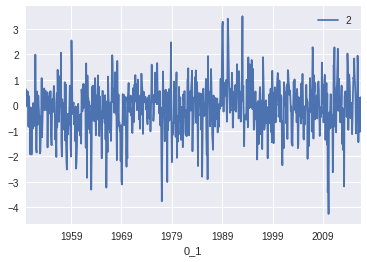

In [6]:
ts.plot()

Now that our series is indexed by timestamps, we can aggregate using time related semantics.

In [ ]:
ts.index.year

In [10]:
ts.groupby(ts.index.year).mean().head()

,2
0_1,
1950,-0.199501
1951,-0.364626
1952,-0.674990
1953,-0.016515
1954,-0.000770


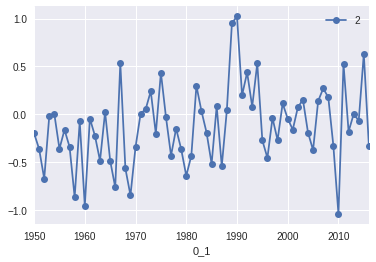

In [11]:
ts.groupby(ts.index.year).mean().plot(marker='o')

Using `pd.Grouper` we can specify more complex groupings.

In [ ]:
ts.groupby(pd.Grouper(freq='5Y')).mean().head()

In [ ]:
ts.groupby(pd.Grouper(freq='5Y')).mean().index[0]

In [ ]:
ts.groupby(pd.Grouper(freq='5Y')).mean().head()

In [7]:
ts.groupby(pd.Grouper(freq='d')).mean().head()

,2
0_1,
1950-01-01,-0.06031
1950-01-02,NaN
1950-01-03,NaN
1950-01-04,NaN
1950-01-05,NaN


### Resampling
If you do not like the frequency at which your data is sampled you can change the sampling frequency.

In [9]:
nineteenfifty = ts['1950']
nineteenfifty.head()

,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [ ]:
nineteenfifty.plot(marker='o')

In [8]:
nineteenfifty.asfreq('12D', method='ffill').head()

NameError: name 'nineteenfifty' is not defined

In [ ]:
nineteenfifty.plot(style='--o')

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)

nineteenfifty.asfreq('12D').plot(ax=ax[0], style='-o')
nineteenfifty.asfreq('12D', method='ffill').plot(ax=ax[1], marker='o')
nineteenfifty.asfreq('12D', method='bfill').plot(ax=ax[1], style='--o', label='backward')
nineteenfifty.plot(ax=ax[1], style='o')
ax[0].legend(['no fill']);
ax[1].legend(['forward-fill', 'back-fill', 'original']);

Downsampling can be done by specifying a smaller frequency.

In [ ]:
nineteenfifty.asfreq('3M', method='ffill').plot(marker='o')

In [ ]:
fig, ax = plt.subplots()
nineteenfifty.asfreq('3M', method='ffill').plot(marker='o', ax=ax)
nineteenfifty.plot(ax=ax, style='o')
ax.legend(['3 Month', 'original']);

In [ ]:
#last = nineteenfifty.iloc[-1]
#last.name = last.name.to_period(freq='M').to_timestamp(how='E')

Resampling can also be combined with aggregation using `resample`.
Let's look at some stock data to illustrate this.

In [ ]:
yahoo = pd.read_csv('data/yahoo_stock.csv', index_col=0, parse_dates=True)
yahoo.head()

In [ ]:
ts = yahoo['Close']
ts.plot()

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [ ]:
ts.plot(alpha=0.5, style='-')
ts.resample('BA').mean().plot(style=':')
ts.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

### Shifting and Differencing
Shifting data in time can be done in two ways. `shift` actually moves the data. Creating missing values at the one end and losing data at the other. In contrast, `tshift` only shifts the time index of the data and not the data itself.

In [ ]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
ts_resampled = ts.asfreq('D', method='ffill')

ts.plot(ax=ax[0])
ts_resampled.shift(365).plot(ax=ax[1])
ts_resampled.tshift(365).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2011-11-05')
offset = pd.Timedelta(365, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(365)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(365)'], loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');
plt.tight_layout()

Shifting is useful for calculations that compare values across timesteps. An example is differencing to remove trend in the timeseries.

In [ ]:
(ts_resampled - ts_resampled.shift(periods=1)).plot()

For differencing, pandas provides the convenient `diff` method.

In [ ]:
ts_resampled.diff(periods=1).plot()

## Window functions
Window functions are similar to `groupby` as they split data into different groups based on a changing window. The points in each window are aggregated using a summary statistic and then combined back into a timeseries.

### Rolling window
A rolling window is the standard example of a window function. It moves a window of fixed size across the timeseries.

In [ ]:
ts_resampled.plot()
ts_resampled.rolling(365).mean().plot()

Setting `center=True` the point that is aggregated and put into the new series will be from the middle of the window and not from its end. 

In [ ]:
ts_resampled.plot()
ts_resampled.rolling(365, center=True).mean().plot()

### Expanding windows
An expanding window only has a minimal size. Then it grows bigger with each step, taking all previous values into account. This is useful if your timeseries measures a stationary value that only fluctuates around a mean.

In [ ]:
ts_resampled.plot()
ts_resampled.expanding(min_periods=365).mean().plot()

### Exponential weighted windows
An exponential weighted window works like an expanding window, but gives more recent datapoints an exponentially higher weighting in all calculations. Thus it can be viewed as a smooth version of a rolling window.

In [ ]:
ts_resampled.plot()
ts_resampled.ewm(com=50.5, min_periods=5).mean().plot()

First info regarding anything to do with timeseries: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Further:  
A complete time series analysis tutorial. It includes handling time zones plus basic time series prediction and classification.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('zmfe2RaX-14')